In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("height-weight.csv")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Height')

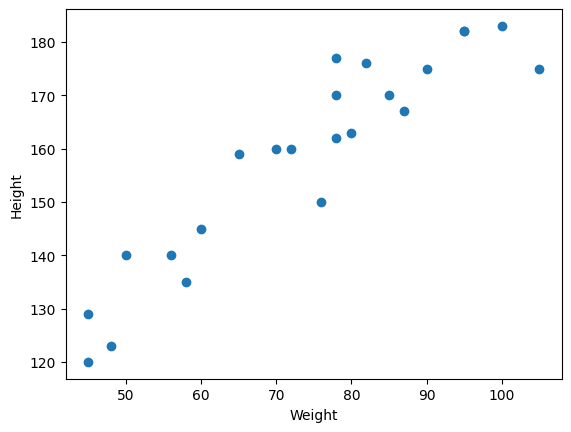

In [6]:
plt.scatter(df.Weight,df.Height)
plt.xlabel("Weight")
plt.ylabel("Height")

In [7]:
# Divide the data
x=df[["Weight"]]
y=df["Height"]

In [8]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [9]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [ ]:
# Scaling the data by Standardization >> train data -->> fit_transform Or test data -->> transform
# Always Scale the data after train test split
# y/target variable can not be scaled
# Avoid Scaling categorical data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [21]:
x_train

array([[ 0.37554243],
       [-0.36825034],
       [-1.73187043],
       [ 0.00364604],
       [ 0.25157697],
       [ 0.87140428],
       [-1.11204312],
       [ 0.56149062],
       [-1.91781863],
       [ 0.12761151],
       [-0.24428488],
       [-1.23600858],
       [ 0.12761151],
       [ 1.18131794],
       [ 1.80114525],
       [ 1.18131794],
       [ 0.12761151]])

In [20]:
x_test

array([[ 45.],
       [ 65.],
       [ 60.],
       [100.],
       [ 87.],
       [ 50.]])

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [24]:
print("The Slope or Coefficient of model is ",model.coef_)
print("The intercept of the model is ",model.intercept_)

The Slope or Coefficient of model is  [17.7307072]
The intercept of the model is  160.0


In [ ]:
model.predict(x_train)

array([166.65863288, 153.47066096, 129.29271243, 160.06464692,
       164.46063756, 175.45061417, 140.28268904, 169.95562586,
       125.99571945, 162.26264224, 155.66865628, 138.08469371,
       162.26264224, 180.94560247, 191.93557907, 180.94560247,
       162.26264224])

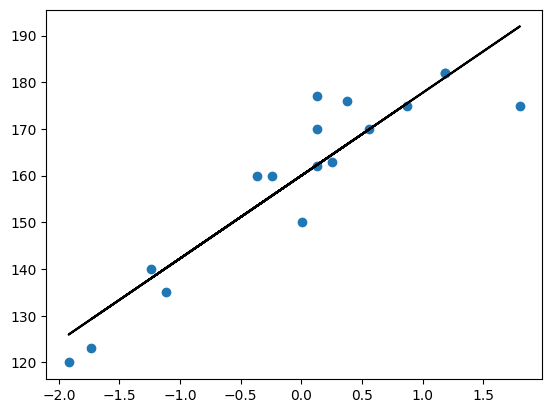

In [28]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color="black")

In [39]:
y_pred_test=model.predict(x_test)
y_pred_test

array([ 957.88182395, 1312.49596793, 1223.84243193, 1933.07071989,
       1702.5715263 , 1046.53535994])

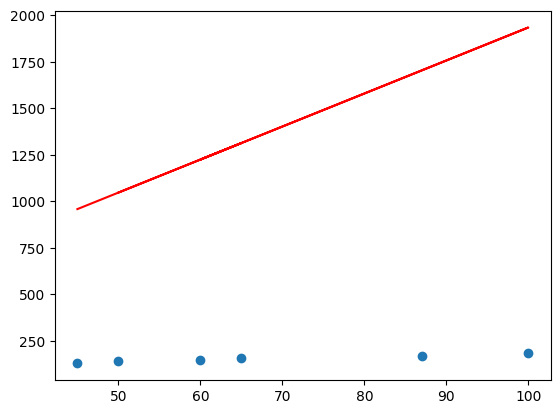

In [36]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test,'r')

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

print(mse,mae,rmse)

1570672.1358142213 1208.8996383252438 1253.2645913031379


In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_test)

-4864.691153025727